In [47]:
import functools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

in_file = "/home/jovyan/data/large_target_store_products_dataset_sample - large_target_store_products_dataset_sample.csv"
data = pd.read_csv(in_file)
data.head()

title  \
0  NMR Distribution Zoltar Fortunes Playing Cards...   
1  The Gifted Stationery 2021 - 2022 Monthly Wall...   
2           Doctor Who: Series Three, Part Two (DVD)   
3  Blue Panda 75 Pieces Tie Dye Birthday Party Su...   
4  Sullivans Hammered Metal Wall Medallions Set o...   

                                                 url                  brand  \
0  https://www.target.com/p/nmr-distribution-zolt...       NMR Distribution   
1  https://www.target.com/p/the-gifted-stationery...  The Gifted Stationary   
2  https://www.target.com/p/doctor-who-series-thr...           Warner Bros.   
3  https://www.target.com/p/blue-panda-75-pieces-...             Blue Panda   
4  https://www.target.com/p/sullivans-hammered-me...              Sullivans   

                                          main_image       sku  \
0  https://target.scene7.com/is/image/Target/GUES...  81917300   
1  https://target.scene7.com/is/image/Target/GUES...  84821007   
2  https://target.scene7.com/is/image/Target/GUES...  15432753   
3  https://target.scene7.com/is/image/Target/GUES...  84199597   
4  https://target.scene7.com/is/image/Target/GUES...  86345566   

                                         description  \
0  Zoltar the Great Gypsy can see your future… Yo...   
1  16 month wall calendar provides easy planning ...   
2  Tenth Doctor David Tennant (Broadchurch, Harry...   
3  Throwing a party has never been easier, we’ve ...   
4  Bring a little charm and delight to your space...   

                                     raw_description         gtin13 currency  \
0  <div class="h-margin-v-default" data-test="ite...   840391145528      USD   
1  <div class="h-margin-v-default" data-test="ite...  9781801433983      USD   
2  <div class="h-margin-v-default" data-test="ite...   883929408115      USD   
3  <div class="h-margin-v-default" data-test="ite...   194425194489      USD   
4  <div class="h-margin-v-default" data-test="ite...    23271231140      USD   

    price  ...           sub_category_1 sub_category_2  sub_category_3  \
0   10.99  ...                    Games    Adult Games             NaN   
1   12.99  ...                Calendars            NaN             NaN   
2   10.89  ...                   Movies            NaN             NaN   
3   26.99  ...  Birthday Party Supplies            NaN             NaN   
4  118.99  ...               Home Decor     Wall Decor    Wall Accents   

                                              images  \
0  https://target.scene7.com/is/image/Target/GUES...   
1  https://target.scene7.com/is/image/Target/GUES...   
2  https://target.scene7.com/is/image/Target/GUES...   
3  https://target.scene7.com/is/image/Target/GUES...   
4  https://target.scene7.com/is/image/Target/GUES...   

                                  raw_specifications  \
0  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
1  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
2  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
3  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
4  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   

                                      specifications  \
0  Suggested Age: 6 Years and Up | Suggested Age:...   
1  Dimensions (Overall): 11.9 inches (L), 11.9 in...   
2  Movie Category: Television | Movie Category: T...   
3  Number of Pieces: 24 | Number of Pieces: 24 | ...   
4  Dimensions (Overall): 23 inches (H) x 1 inches...   

                                          highlights  \
0  ZOLTAR CARDS: Zoltar the Great Gypsy can see y...   
1  16-MONTH CALENDAR: Easy planning and goal sett...   
2  Run Time: 315:00 min | Disc Count: 2 | Rating:...   
3  Serves 24: Includes 1 plastic table cover, a b...   
4  This unique wall set will be the perfect addit...   

                                      raw_highlights  \
0  <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   
1  <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   
2  <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   
3  

In [9]:
data.axes[1]

Index(['title', 'url', 'brand', 'main_image', 'sku', 'description',
       'raw_description', 'gtin13', 'currency', 'price', 'availability',
       'availableDeliveryMethod', 'available_branch', 'primary_category',
       'sub_category_1', 'sub_category_2', 'sub_category_3', 'images',
       'raw_specifications', 'specifications', 'highlights', 'raw_highlights',
       'uniq_id', 'scraped_at'],
      dtype='object')

In [3]:
def render_html(html: str):
    """Render an html string"""
    display(HTML(html))

render_html(data.loc[0, 'raw_specifications'])

In [5]:
def look_for_matches(data: pd.DataFrame, pattern: str, colname : str = "raw_specifications") -> str:
    """Useful for finding cells in raw_specifications containing a given string"""
    return data.loc[data.loc[:, colname].str.contains(pattern), colname].iloc[0]

render_html(look_for_matches(data, "Material"))

In [6]:
render_html(look_for_matches(data, "Package"))

In [7]:
render_html(look_for_matches(data, "Weight"))

In [8]:
render_html(look_for_matches(data, "Dimensions"))

In [9]:
render_html(look_for_matches(data, "TCIN"))

In [10]:
render_html(look_for_matches(data, "Origin"))

In [11]:
colname = "raw_specifications"
patterns = ["Material", "Package Quantity", "Weight", "Dimensions", "TCIN", "Origin"]

(data.loc[:, colname].str.contains("Package Quantity") | data.loc[:, colname].str.contains("Number of Pieces")).value_counts()

# Package Quantity and Number of Pieces are never found together. Maybe they refer to the same thing?

raw_specifications
False    124
True      43
Name: count, dtype: int64

In [12]:
sel = data.loc[:, "raw_specifications"].str.contains("Dimensions")
dimensions = data.loc[sel]
sel_overall = ~dimensions.loc[sel, "raw_specifications"].str.contains("Overall")
#for x in dimensions.loc[sel_overall, "raw_specifications"]:
#    render_html(x)
dimensions.loc[sel_overall]

# looks like "dimenions" can be "Dimensions (Overall)", "Dimensions" or other things
# like "Assembled Dimensions" or "Piece X Dimensions". But this latter two options are
# incomplete (lack the height), harder to parse and rare enough that I'll just drop them

title  \
8   NCAA Illinois Fighting Illini Circo Cheese Cut...   
13  Blue Panda Jumbo Dinosaur Floor Puzzle, Double...   
14  Women's Round Aviator Sunglasses - Universal T...   

                                                  url             brand  \
8   https://www.target.com/p/ncaa-illinois-fightin...              NCAA   
13  https://www.target.com/p/blue-panda-jumbo-dino...        Blue Panda   
14  https://www.target.com/p/women-39-s-round-avia...  Universal Thread   

                                           main_image       sku  \
8   https://target.scene7.com/is/image/Target/GUES...  79646040   
13  https://target.scene7.com/is/image/Target/GUES...  80405355   
14  https://target.scene7.com/is/image/Target/GUES...  84201225   

                                          description  \
8   Reach out to the complex cheese lover in your ...   
13  Package Includes\r\nLarge Dinosaur Floor Puzzl...   
14  Round out your eyewear collection with the Rou...   

                                      raw_description        gtin13 currency  \
8   <div class="h-margin-v-default" data-test="ite...   99967205276      USD   
13  <div class="h-margin-v-default" data-test="ite...  194425203808      USD   
14  <div class="h-margin-v-default" data-test="ite...  195995526496      USD   

    price  ...   sub_category_1              sub_category_2  \
8   58.95  ...  Sports Fan Shop  Sports Fan Shop Home Goods   
13  19.99  ...          Puzzles                         NaN   
14  15.00  ...         Eye Care                         NaN   

                         sub_category_3  \
8   Sports Fan Shop Barware & Drinkware   
13                                  NaN   
14                                  NaN   

                                               images  \
8   https://target.scene7.com/is/image/Target/GUES...   
13  https://target.scene7.com/is/image/Target/GUES...   
14  https://target.scene7.com/is/image/Target/GUES...   

                                   raw_specifications  \
8   <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
13  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   
14  <div class="styles__StyledCol-sc-ct8kx6-0 iKGd...   

                                       specifications  \
8   Number of Pieces: 5 | Number of Pieces: 5 | We...   
13  Number of Pieces: 17 | Number of Pieces: 17 | ...   
14  Material: Metal (Frame) | Material: Metal (Fra...   

                                           highlights  \
8   BEAUTY & ELEGANCE - The Circo swivel-style cir...   
13  JUMBO DINOSAUR PUZZLE: This t-rex foam puzzle ...   
14  Universal Thread round aviator sunglasses with...   

                                       raw_highlights  \
8   <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   
13  <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   
14  <li class="styles__Bullet-sc-6aebpn-0 eIfLaI">...   

                                 uniq_id scraped_at  
8   0c549116-75c8-56cb-8877-165380d0efd9   06/12/22  
13  151c72b4-4856-502f-a508-961cc81fffa9   06/12/22  
14  2a803c0f-00bf-50a6-a490-d381620ac3a3   06/12/22  

[3 rows x 24 columns]

In [13]:
import xml.etree.ElementTree as ET

# There seem to be dupliucates on "specifications" that are not 
# found on "raw_specifications"
# I think it's safe to just remove the duplicates

specifications = data.loc[1,"specifications"]
specifications



"Dimensions (Overall): 11.9 inches (L), 11.9 inches (W) | Dimensions (Overall): 11.9 inches (L), 11.9 inches (W) | Dated format: Monthly | Dated format: Monthly | Calendar year: 2022 | Calendar year: 2022 | Material: Paper | Material: Paper | TCIN: 84821007 | UPC: 9781801433983 | Origin: imported | The above item details were provided by the Target Plus™ Partner. Target does not represent or warrant that this information is accurate or complete. On occasion, manufacturers may modify their items and update their labels.We recommend that you do not rely solely on the information presented. If you have a specific question about this item, you may consult the item's label, contact the manufacturer directly or call Target Guest Services at 1-800-591-3869."

In [14]:
def parse_specs(specifications: str) -> dict[str,str]:
    fields_mapping = {
        "Material": "materials",
        "Package Quantity": "packaging",
        "Number of Pieces": "packaging",
        "Dimensions (Overall)": "dimensions",
        "Dimensions": "dimensions",
        "Weight": "weight",
        "TCIN": "tcin",
        "Origin": "origin",        
    }
    spec_dict = {}
    for spec in specifications.split("|"):
        if ":" in spec:
            try:
                field, value = spec.split(":")
            except ValueError:
                print(spec)
                return {}
            field = field.strip()
            if field in fields_mapping:
                field = fields_mapping[field]
                spec_dict[field] = value.strip()
    return spec_dict



def iter_parse(root: ET.Element) -> dict[str,str]:
    """Recursively parse the XML tree into a dictionary
    Each key/value pair is inside it's own <div> tag and
    the key inside a <b> tag.
    The fields that I believe are compulsory (TCIN, UPC and Origin)
    are only nested one level deep, while the rest of fields seem
    to be always nested two levels deep. But parsing it recursively
    helps generalise both cases."""
    
    spec_dict = {}
    for child in root:
        if child.tag == "div":
            if "b" in [x.tag for x in child]:
                key, *values = child.itertext()
                key = key.strip(":")
                value = "".join(values).strip(":")
                spec_dict[key] = value
            else:
                spec_dict.update(iter_parse(child))
    return spec_dict

def parse_raw_specs(raw_specs: str) -> dict[str,str]:
    """Parse a raw specifications XML string into a dictionary
    This involves first recursively parsing the XML tree and then
    renaming the key values"""
    
    fields_mapping = {
        "Material": "materials",
        "Package Quantity": "packaging",
        "Number of Pieces": "packaging",
        "Dimensions (Overall)": "dimensions",
        "Dimensions": "dimensions",
        "Weight": "weight",
        "TCIN": "tcin",
        "Origin": "origin",        
    }
    xml_root = ET.fromstring(raw_specs)
    parsed = iter_parse(xml_root)
    specs_dict = {
        fields_mapping[key]: value
        for key, value in parsed.items()
        if key in fields_mapping
    }
    return specs_dict
        

def parse_value(specs: str, value: str) -> str:
    return parse_raw_specs(specs).get(value)

for x in ["materials", "packaging", "dimensions", "weight", "tcin", "origin"]:
    print(data["raw_specifications"].apply(parse_value, value=x))


0            None
1           Paper
2            None
3           Paper
4           Metal
          ...    
162       Plastic
163          None
164        Fabric
165          None
166     Stoneware
Name: raw_specifications, Length: 167, dtype: object
0      None
1      None
2      None
3        24
4      None
       ... 
162    None
163    None
164    None
165    None
166       1
Name: raw_specifications, Length: 167, dtype: object
0                                                   None
1                       11.9 inches (L), 11.9 inches (W)
2                                                   None
3                                                   None
4           23 inches (H) x 1 inches (W) x 23 inches (D)
                             ...                        
162                      5.0 inches (W) x 9.5 inches (D)
163                    12.0 inches (H) x 12.0 inches (W)
164     4.75 inches (H) x 2.25 inches (W) x 2.25 inch...
165                                                

In [17]:
import re
from typing import Optional

def parse_dimensions_measure(dimensions: str, measure: str) -> Optional[dict[str,str]]:
    expr = f"(?P<value>\d*[.,]?\d*)\s+(?P<unit>[a-zA-Z]*)\s+\({measure}\)" 
    if match := re.search(expr, dimensions):
        return {
            "value": float(match.group("value")),
            "unit": match.group("unit").lower()
        }

def units_to_cm(value: float, unit: str) -> float:
    conversions = {
        "inches": 2.54,
        "feet": 30.48,
        "cm": 1
    }
    return value * conversions[unit]


def parse_dimensions(dimensions: Optional[str]) -> Optional[dict[str,float]]:
    if dimensions is None:
        return None
    height = parse_dimensions_measure(dimensions, "H")
    width = parse_dimensions_measure(dimensions, "W")
    depth = parse_dimensions_measure(dimensions, "D")
    dimensions = {
        "height": height,
        "width": width,
        "depth": depth,
    }
    return {
        key: units_to_cm(**value)
        for key,value in dimensions.items()
        if value is not None
    }

dimensions = data["raw_specifications"].apply(parse_value, value="dimensions").apply(parse_dimensions)
dimensions

0                                                   None
1                          {'width': 30.226000000000003}
2                                                   None
3                                                   None
4       {'height': 58.42, 'width': 2.54, 'depth': 58.42}
                             ...                        
162                      {'width': 12.7, 'depth': 24.13}
163                    {'height': 30.48, 'width': 30.48}
164    {'height': 12.065, 'width': 5.715, 'depth': 5....
165                                                 None
166    {'height': 11.43, 'width': 31.75, 'depth': 11.43}
Name: raw_specifications, Length: 167, dtype: object

In [51]:
def units_to_g(value: float, unit: str) -> float:
    conversions = {
        "pounds": 453.592,
        "ounces": 28.3495,
        "g": 1
    }
    return value * conversions[unit]

def parse_weight(weight: str):
    if weight is None:
        return None
    expr = f"(?P<value>\d*[.,]?\d*)\s+(?P<unit>[a-zA-Z]*)"

    # strip is needed to prevent the regex from lazily
    # matching just from the first whitespace separator,
    # this could happen because the number part in the
    # expression is technically all optional, to avoid
    # an expression too complex and unreadable
    if match := re.search(expr, weight.strip()):
        value = float(match.group("value"))
        unit = match.group("unit").lower()
        return units_to_g(value, unit)

    return weight

def calculate_dimensional_weight(dimensions: dict[str,float]):
    """The dimensional weight (in kg) is calculated as
    Length * Height * Width (in cm) / 5000.
    We'll return it in g here"""
    if dimensions is None:
        return None
        
    height = dimensions.get("height")
    width = dimensions.get("width")
    depth = dimensions.get("depth")
    if None in [height, width, depth]:
        return None
        
    return height * width * depth / 5000

weight = data["raw_specifications"].apply(parse_value, value="weight").apply(parse_weight)

dimensional_weight = list(map(calculate_dimensional_weight, dimensions))

sel = weight.isnull()
weight[sel] = pd.Series(dimensional_weight)[sel]

weight

0               NaN
1               NaN
2               NaN
3               NaN
4       2109.202800
           ...     
162      127.005760
163    14514.944000
164        0.078812
165             NaN
166        0.829595
Name: raw_specifications, Length: 167, dtype: float64

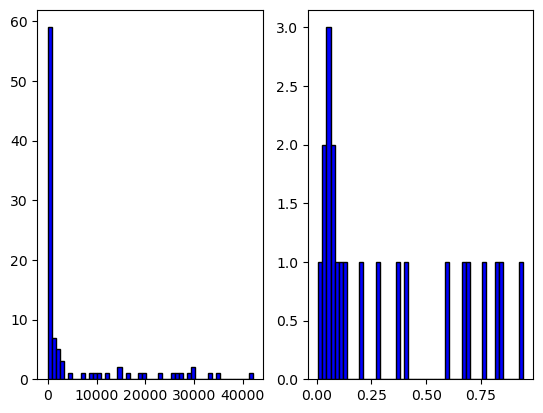

In [74]:
ax = plt.subplot(1, 2, 1)
plt.hist(weight, color='blue', edgecolor='black', bins=50)
ax = plt.subplot(1, 2, 2)
plt.hist(weight[weight <= 1], color='blue', edgecolor='black', bins=50)
plt.show()

In [75]:
materials = data["raw_specifications"].apply(parse_value, value="materials")

# scoreable materials are:
# * metal
# * wood
# * glass
# * resin
# * fabric
# * plastic

def material_classifier(material: str) -> str:
    """I will to match materials to one of the scoreable ones:
      * metal
      * wood
      * glass
      * resin
      * fabric
      * plastic
    I found a few, like stoneware and cardboard that I can't fit
    there, they'll have to remain unscored for now"""

    mapping = {
        "polyester": "fabric",
        "spandex": "fabric",
        "leather": "fabric",
        "cardboard": "carboard",
        "crystal": "glass",
        "hardwood": "wood",
        "plywood": "wood",
        "mdf": "wood",
        "wood": "wood",
        "steel": "metal",
        "polycarbonate": "plastic",
        "polypropylene": "plastic",
        "pvc": "plastic",
        "resin": "plastic",
        "stoneware": "stoneware",
        "cardboard": "cardboard",
        "paper": "cardboard",
    }
    for key, value in mapping.items():
        if key in material:
            return value
    return material

def clean_material_name(material: str) -> str:
    no_paren_annotations = re.sub("\(.*\)", "", material)
    no_amounts = re.sub("\d+%?", "", no_paren_annotations)
    return no_amounts.strip().lower()
    
def parse_materials(materials: str):
    if materials is None:
        return
    material_ls = [
        material_classifier(clean_material_name(x))
        for x in materials.split(",")
    ]
    return list(set(material_ls))

clean_materials = materials.apply(parse_materials)
clean_materials

0             None
1      [cardboard]
2             None
3      [cardboard]
4          [metal]
          ...     
162      [plastic]
163           None
164       [fabric]
165           None
166    [stoneware]
Name: raw_specifications, Length: 167, dtype: object

In [21]:
packaging = data["raw_specifications"].apply(parse_value, value="packaging")
packaging[packaging.isnull()] = 1
packaging

0        1
1        1
2        1
3       24
4        1
      ... 
162      1
163      1
164      1
165      1
166      1
Name: raw_specifications, Length: 167, dtype: object

In [41]:
def clean_origin_name(origin: str) -> str:
    mapping = {
        "assem usa w/foreign/dom. parts": "mixed",
        "imported": "imported",
        "made in the usa": "usa",
        "made in the usa or imported": "mixed",
    }
    origin = origin.lower().strip()
    return mapping[origin]

origin = data["raw_specifications"].apply(parse_value, value="origin")
clean_origin = origin.apply(clean_origin_name)
clean_origin

{NoneType, dict}

In [46]:
def get_val(xs, i):
    if xs is None:
        return None
    return xs.get(i)

clean_data = pd.DataFrame(
    data={
        "materials": clean_materials,
        "packaging": packaging,
        "origin": clean_origin,
        "weight": weight,
        "height": dimensions.apply(get_val, i="height"),
        "width": dimensions.apply(get_val, i="width"),
        "depth": dimensions.apply(get_val, i="depth"),
        "tcin": data["raw_specifications"].apply(parse_value, value="tcin"),
        "primary_category": data["primary_category"]
    }
)

clean_data

clean_data[~clean_data.isnull().any(axis=1)].head()

materials packaging    origin       weight  height   width   depth  \
4    [metal]         1  imported  2109.202800  58.420   2.540  58.420   
5    [glass]         1     mixed     0.080297  20.320   4.445   4.445   
6     [wood]         1     mixed     0.275303  13.335  10.160  10.160   
11  [fabric]         1     mixed     2.726807  33.020  20.320  20.320   
15   [metal]         1  imported  1360.776000  74.930   1.270  31.115   

         tcin primary_category  
4    86345566             Home  
5    75552641     Holiday Shop  
6    81632725     Holiday Shop  
11   81726538     Holiday Shop  
15   86435324             Home

In [15]:
weight = data["raw_specifications"].apply(parse_value, value="weight")
sel = weight == " 4.65 pounds"
data.loc[sel, "gtin13"]

4    23271231140
Name: gtin13, dtype: int64